<a href="https://colab.research.google.com/github/yamenka/UniRank_2021/blob/main/uniRankYamen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
!{sys.executable} -m pip install pycaret


In [180]:
import pycaret
import pandas as pd
from pycaret.clustering import *
from pycaret.regression import *
from pycaret.utils import check_metric

In [182]:
df = pd.read_csv('https://github.com/Ainagbolahan/HDSC-21-SCIPY-GROUP/blob/main/dataset/wur_2021.csv?raw=true')
df2 = pd.read_csv('https://github.com/Ainagbolahan/HDSC-21-SCIPY-GROUP/blob/main/dataset/times-higher-edu-2021.csv?raw=true')

In [183]:
df2.pop('Overall')

0            95.6
1            94.9
2            94.8
3            94.5
4            94.4
          ...    
1521    10.3–25.0
1522    10.3–25.0
1523    10.3–25.0
1524    10.3–25.0
1525    10.3–25.0
Name: Overall, Length: 1526, dtype: object

In [184]:
new = df['Female:Male Ratio'].str.split(':',n=1, expand=True)
df['Male'] = new[1]
df['Female'] = new[0]


In [185]:
df.pop('Female:Male Ratio')

0       46 : 54
1       44 : 56
2       49 : 51
3       36 : 64
4       39 : 61
         ...   
1521    42 : 58
1522    57 : 43
1523    54 : 46
1524    59 : 41
1525    34 : 66
Name: Female:Male Ratio, Length: 1526, dtype: object

In [186]:
df['International Students'].replace('%',value='',regex=True,inplace=True)

In [187]:
df['International Students'] = pd.to_numeric(df['International Students'])

In [188]:
df['No. of FTE Students'].replace(',',value='',regex=True, inplace = True)

In [189]:
df['No. of FTE Students'] = pd.to_numeric(df['No. of FTE Students'])

In [190]:
df['Female'] = pd.to_numeric(df['Female'])
df['Male'] = pd.to_numeric(df['Male'])
df3 = df.merge(df2,how='outer',on='NameCountry/Region')


In [191]:
df3.pop('Rank_y')

0              1
1              2
2              3
3              4
4              5
          ...   
1523       1001+
1524       1001+
1525       1001+
1526     301–350
1527    801–1000
Name: Rank_y, Length: 1528, dtype: object

In [200]:
df3['Rank_x'] = df3['Rank_x'].str.replace('=', '')
df3['Rank_x'] = df3['Rank_x'].str.replace('+', '')
new3 = df3['Rank_x'].str.split('–', n=1, expand=True)
df3['Rank_x'] = new3[0]
df3['Rank_x'] = pd.to_numeric(df3['Rank_x'])


In [202]:
dataset = df3

In [204]:
data = dataset.sample(frac=0.9,random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(drop=True,inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

In [205]:
exp_reg101 = setup(data = data, ignore_features=['NameCountry/Region'], target='Rank_x',session_id=123)

,Description,Value
0,session_id,123
1,Target,Rank_x
2,Original Data,"(1375, 12)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(961, 9)"


In [206]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,24.5816,1.739319e+03,41.4302,0.9838,0.0990,0.0642,0.456
lightgbm,Light Gradient Boosting Machine,31.1000,2.391757e+03,48.6056,0.9779,0.1801,0.0994,0.135
gbr,Gradient Boosting Regressor,33.7297,2.585095e+03,50.5168,0.9761,0.1477,0.1021,0.170
rf,Random Forest Regressor,30.2856,2.599725e+03,50.5401,0.9759,0.1303,0.0858,0.599
ada,AdaBoost Regressor,59.1304,5.105629e+03,71.1081,0.9529,0.3739,0.4848,0.124
dt,Decision Tree Regressor,35.1091,5.943321e+03,75.8158,0.9449,0.1968,0.1075,0.019
lr,Linear Regression,67.6153,7.923390e+03,88.6993,0.9271,0.4960,1.2853,0.277
lasso,Lasso Regression,67.6184,7.920485e+03,88.6832,0.9271,0.4955,1.2845,0.013
ridge,Ridge Regression,67.6154,7.923388e+03,88.6993,0.9271,0.4960,1.2853,0.013
lar,Least Angle Regression,67.6153,7.923389e+03,88.6993,0.9271,0.4960,1.2853,0.014


In [209]:
et = create_model('et')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,24.5322,1763.7684,41.9972,0.9843,0.1172,0.0685
1,25.2438,1843.5409,42.9365,0.9840,0.0983,0.0644
2,21.0902,1105.9658,33.2561,0.9909,0.0856,0.0578
3,31.3060,2797.5864,52.8922,0.9712,0.0871,0.0582
4,24.0188,1569.5285,39.6173,0.9860,0.0892,0.0574
5,23.8139,1409.1777,37.5390,0.9874,0.0960,0.0632
6,24.9522,1574.0561,39.6744,0.9847,0.0894,0.0609
7,22.5629,1907.7611,43.6779,0.9819,0.1527,0.0979
8,23.1010,1645.2522,40.5617,0.9859,0.1035,0.0663
9,25.1948,1776.5565,42.1492,0.9821,0.0712,0.0473


In [210]:
tuned_dt = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,29.5139,2663.0709,51.6050,0.9762,0.2064,0.1298
1,30.2151,1966.3654,44.3437,0.9829,0.1468,0.0973
2,26.9589,1427.7761,37.7859,0.9882,0.1379,0.0919
3,36.3846,2990.0667,54.6815,0.9692,0.1044,0.0761
4,29.8309,1864.1746,43.1761,0.9834,0.1739,0.1090
5,29.6539,1970.6996,44.3926,0.9824,0.1515,0.0983
6,29.9414,1878.1915,43.3381,0.9817,0.1129,0.0781
7,30.7566,2532.0803,50.3198,0.9760,0.2526,0.2121
8,33.1505,2737.2245,52.3185,0.9766,0.1794,0.1245
9,32.5999,2473.2827,49.7321,0.9751,0.0906,0.0656


In [211]:
print(tuned_dt)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


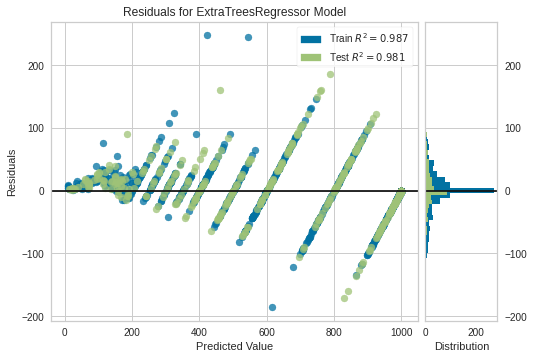

In [212]:
plot_model(tuned_dt,plot = 'residuals')

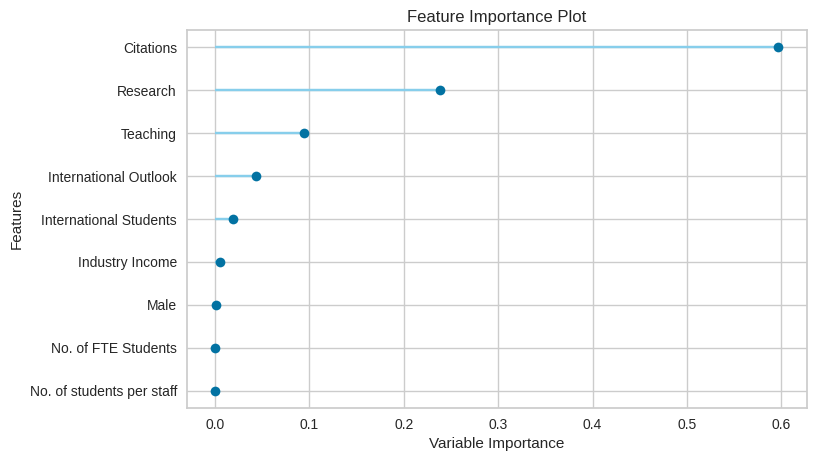

In [213]:
plot_model(tuned_dt,plot='feature')

In [214]:
plot_model(tuned_dt,plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,mse
max_depth,9
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.1
min_impurity_split,None
min_samples_leaf,4


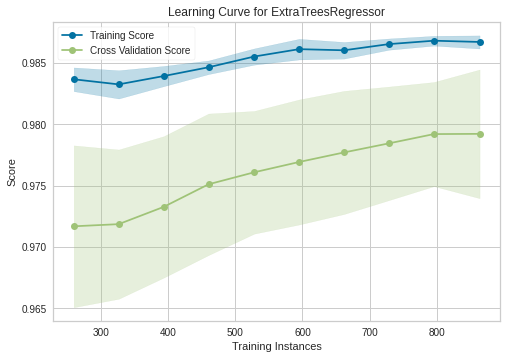

In [215]:
plot_model(tuned_dt,plot='learning')

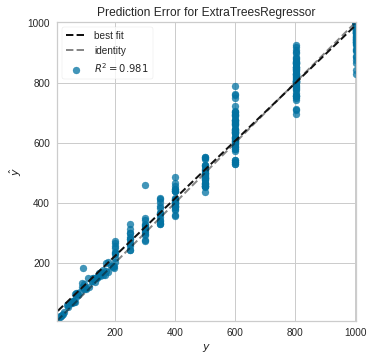

In [217]:
plot_model(tuned_dt,plot='error')

In [218]:
final_model = finalize_model(tuned_dt)

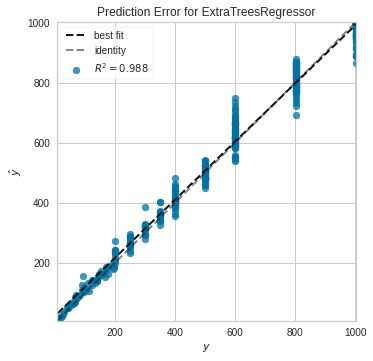

In [220]:
plot_model(final_model,'error')

In [222]:
new_data = predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,24.2128,1292.8062,35.9556,0.9881,0.0799,0.0561


In [224]:
unseen = predict_model(final_model, data = data_unseen)

In [225]:
unseen.head(100)

,Rank_x,NameCountry/Region,No. of FTE Students,No. of students per staff,International Students,Male,Female,Teaching,Research,Citations,Industry Income,International Outlook,Label
0,6.0,University of CambridgeUnited KingdomCoursesEn...,19370.0,11.0,38.0,53.0,47.0,90.3,99.2,95.6,52.1,95.7,10.327721
1,8.0,Yale UniversityUnited StatesCoursesEnquireAdmi...,12910.0,6.0,20.0,50.0,50.0,91.9,93.8,97.9,56.1,68.4,11.165763
2,14.0,ETH ZurichSwitzerlandCourses,19632.0,13.1,40.0,68.0,32.0,80.4,92.3,90.5,62.8,98.0,19.161082
3,18.0,University of TorontoCanadaCoursesEnquireExplore,74502.0,20.0,22.0,41.0,59.0,75.4,90.9,94.5,50.0,87.2,21.572713
4,33.0,"University of California, San DiegoUnited Stat...",34232.0,12.0,30.0,53.0,47.0,60.3,80.4,94.3,95.6,64.4,38.364488
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,801.0,Istanbul UniversityTurkeyCourses,87146.0,38.2,7.0,49.0,51.0,25.4,23.7,32.5,45.2,29.3,782.205100
96,801.0,Kerman University of Medical SciencesIranCourses,5422.0,3.9,0.0,37.0,63.0,25.4,8.1,48.1,34.4,15.3,797.816545
97,801.0,Old Dominion UniversityUnited StatesCoursesEnq...,18811.0,18.2,3.0,44.0,56.0,23.4,19.7,46.9,33.3,30.3,682.990636
98,801.0,Polytechnic University of ValenciaSpainCourses,22019.0,10.6,15.0,61.0,39.0,22.8,16.9,40.3,46.0,51.6,763.796865
